# Моделирование случайных величин. Вариант 6.

## Постановка задачи

### Случайная величина $\eta$ - Время обслуживания покупателя в кассе магазина. Пусть $\eta$ распределена показательно с параметром $\lambda$.


Найдем обратную ф-ию для ф-ии распределения:
$$
f(x)=
\begin{cases}
    0                       & \text{, если } x < 0\\
    \lambda e^{-\lambda x}  & \text{, если } x \ge 0
\end{cases}
\text{, где } \lambda > 0
$$

$$
F(x)=
\begin{cases}
    0                       & \text{, если } x < 0\\
    1 - e^{-\lambda x}  & \text{, если } x \ge 0
\end{cases}
$$

$$
t = 1 - e^{-\lambda x}
$$

$$
\rightarrow x = -\frac{ln(1 - t)}{\lambda}
$$

$$
\rightarrow G(t) = F^{-1}(t) = -\frac{ln(1 - t)}{\lambda} \text{, где } t \in [0, 1]
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import random
import pandas as pd

In [2]:

def get_functions(lmd):
    def f(x):
        if x < 0:
            return 0
        else:
            return lmd * np.exp(-lmd * x)

    def F(x):
        if x < 0:
            return 0
        else:
            return 1 - np.exp(-lmd * x)

    def G(t):
        return -np.log(1 - t) / lmd
    return f, F, G


## Визуализация функции распределения

In [3]:
lmd = 1
f, F, G = get_functions(lmd)

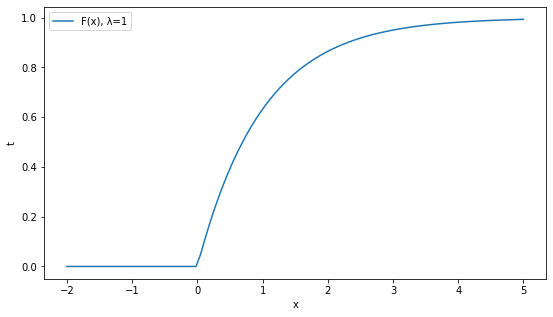

In [4]:
xs = np.linspace(-2, 5, 100)
plt.figure(figsize=(9, 5))
plt.plot(xs, list(map(F, xs)), label=f"F(x), λ={lmd}")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

## Часть №1

Задание:  
Написать первую часть программы - "розыгрыш" значений случайной величины. Эта часть должна включать в себя отображение содержания задачи, пользовательский интерфейс для ввода необходимых параметров, вывод результатов.

Для непрерывной случайной величины значения требуется расположить в порядке возрастания: $x_{(1)} \le x_{(2)}\le ... \le x_{(n)}$. Здесь $x_{(j)}$ - j-е по возрастанию число среди наблюдений $x_1, x_2, ..., x_n$ 


λ = 0.2, n = 20


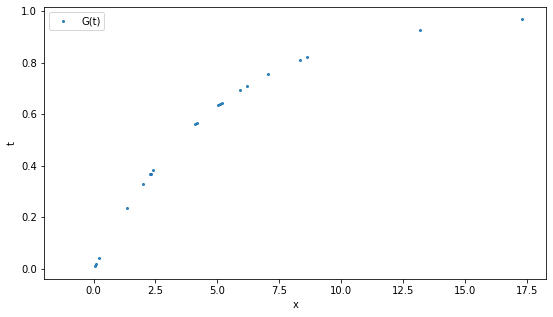

In [6]:
lmd = float(input("Введите параметр λ"))
f, F, G = get_functions(lmd)

n = int(input("Введите число проводимых экспериментов"))

print(f"λ = {lmd}, n = {n}")

xs = list()
ts = list()
for i in range(n):
    ts.append(random.random())
    xs.append(G(ts[-1]))

plt.figure(figsize=(9, 5))
plt.scatter(xs, ts, s=1, label="G(t)", linewidths=2)
plt.xlabel("x")
plt.ylabel("t")
plt.xlim((-2, max(xs)+1))
plt.legend()
plt.show()

In [7]:
x_sort = xs.copy()
x_sort.sort()
print("\n".join([f"x_({i + 1}) = {x_el}" for i, x_el in enumerate(x_sort[:10])]))

x_(1) = 0.04478063519812987
x_(2) = 0.09951920575633155
x_(3) = 0.22106454334507936
x_(4) = 1.3464150643428598
x_(5) = 2.003079565327057
x_(6) = 2.29321059241879
x_(7) = 2.3091540487737796
x_(8) = 2.4089366824103053
x_(9) = 4.114939636094048
x_(10) = 4.1794155611573975


## Часть 2

Определить теоретические и выборочные числовые характеристики: $E\eta, D\eta, \bar{x}, S^2, \widehat{Me}, \widehat{R}$. Составить таблицу:

| $E\eta$ | $\bar{x}$ | $\mid E\eta-\bar{x}\mid$ | $D\eta$ | $S^2$ | $\mid D\eta-S^2\mid$ | $\widehat{Me}$ | $\widehat{R}$ | 
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:| 
|$\dots$|$\dots$|$\dots$|$\dots$|$\dots$|$\dots$|$\dots$|$\dots$|
 
Построить графики теоретической $F_\eta(x)$ и выборочной $\widehat{F}_\eta(x)$ функций распределения. Вычислить меру их расхождений $D$.

Определить из условий задачи закон распределения случайной величины $\eta$, если он не указан явно. Организовать ввод границ промежутков $\Delta'_1, \Delta'_2, ..., \Delta'_k$. Построить гистограмму. Вычислить теоретическую плотность распределения $f(z_j)$ в точке $z_j$ - середине промежутка $\Delta'_j$. Результаты оформить в виде таблицы:

||||||
|:-:|:-:|:-:|:-:|:-:|
|$z_j$|$z_1$|$z_2$|$\dots$|$z_k$|
|$f_\eta(z_j)$|$f_\eta(z_1)$|$f_\eta(z_2)$|$\dots$|$f_\eta(z_k)$|
|$\frac{n_j}{n\mid\Delta'_j\mid}$|$\frac{n_1}{n\mid\Delta'_1\mid}$|$\frac{n_2}{n\mid\Delta'_2\mid}$|$\dots$|$\frac{n_k}{n\mid\Delta'_k\mid}$|

In [8]:
x_bar = np.mean(x_sort) # выборочное среднее
S_2 = np.mean(np.power(x_sort - x_bar, 2)) # выборочная дисперсия
R_wh = x_sort[-1] - x_sort[0] # размах выборки
Me_wh = np.median(x_sort) # выборочная медиана
E_eta = 1 / lmd # математическое ожидание
D_eta = 1 / lmd**2 # дисперсия 

pd.DataFrame(
    [[E_eta, x_bar, np.abs(E_eta - x_bar), D_eta, S_2, np.abs(D_eta - S_2), Me_wh, R_wh]],
    columns=["Eη", "x_bar", "|Eη-x_bar|", "Dη", "S^2", "|Dη-S^2|", "Me", "R"],
    index=[""]
)

,Eη,x_bar,|Eη-x_bar|,Dη,S^2,|Dη-S^2|,Me,R
,5.0,5.047586,0.047586,25.0,18.267741,6.732259,4.603896,17.251879


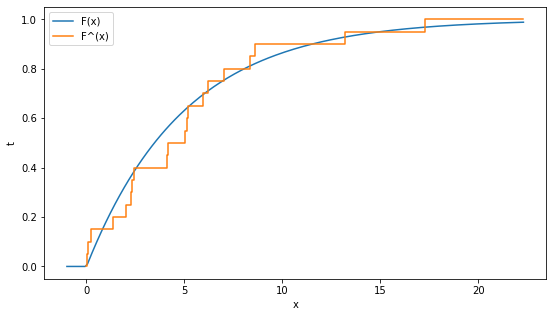

In [9]:
plt.figure(figsize=(9, 5))
plt.plot(np.linspace(-1, x_sort[-1] + 5, 200), list(map(F, np.linspace(-1, x_sort[-1] + 5, 200))), label="F(x)")
plt.step([0] + x_sort + [x_sort[-1] + 5],[0] + [(i+1)/n for i in range(n)] + [1], label="F^(x)", where="post")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

In [10]:
D = 0
for j in range(n):
    D_cur = max((j+1)/n - F(x_sort[j]), F(x_sort[j]) - j/n)
    if D_cur > D:
        D = D_cur
print(f"Мера расхождения F(x) и F^(x) - D = {D:.4f}")

Мера расхождения F(x) и F^(x) - D = 0.1609


∆'1 - [0.00,1.50]
∆'2 - [1.50,2.75]
∆'3 - [2.75,5.00]
∆'4 - [5.00,10.00]


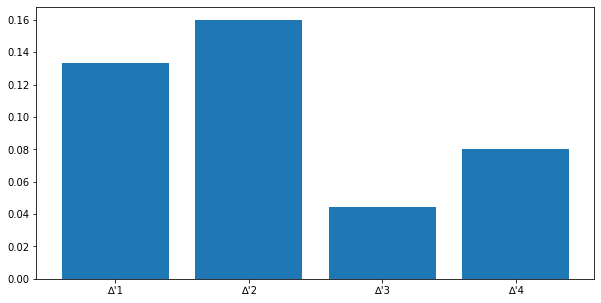

In [12]:
k = int(input("Введите количество промежутков"))\

limits = list()
for i in range(k):
    limits.append(tuple(map(float, input(f"Введите границы ∆'{i+1}").split())))

data = [[],[],[]]
for i, (left, right) in enumerate(limits):
    nj = 0
    for x in x_sort:
        if x >= left and x < right:
            nj += 1
    
    data[0].append((left + right) / 2) # z_j
    data[1].append(f(data[0][-1])) # f(z_j)
    data[2].append(nj / n / (right - left)) # height

    print(f"∆'{i+1} - [{left:.2f},{right:.2f}]")

data = pd.DataFrame(data, index=["zj", "f(zj)", "nj/(n|∆'j|)"], columns=[f"∆'{i+1}" for i in range(k)])

plt.figure(figsize=(10, 5))
plt.bar([f"∆'{i+1}" for i in range(len(data.iloc[-1, :]))], data.iloc[-1, :], align="center")
plt.show()

In [13]:
data

,∆'1,∆'2,∆'3,∆'4
zj,0.750000,2.125000,3.875000,7.500000
f(zj),0.172142,0.130754,0.092141,0.044626
nj/(n|∆'j|),0.133333,0.160000,0.044444,0.080000


In [14]:
print("max|nj/(n|∆'j|) - f(zj)| = {:.4f}".format(np.max(np.abs(data.iloc[-1, :] - data.iloc[1, :]))))

max|nj/(n|∆'j|) - f(zj)| = 0.0477


## Часть 3

1. Ввод числа $k$ интервалов $\Delta''_1=(-\inf,z_1), \Delta''_2=[z_1,z_2),\dots,\Delta''_k=[z_{k-1},\inf)$. Выбор границ интервалов $z_1,z_2,\dots,z_{k-1}$.
2. Отображение гипотезы в виде теоретических вероятностей $q_1,q_2,\dots,q_k$.
3. Ввод уровня значимости $\alpha$.
4. Отображение вычисленного значения $\bar{F}(R_0)$ и решения о принятии или отвержении гипотезы $H_0$.

$$
f_{x_r^2}(x)=
\begin{cases}
    0                                       & \text{, если } x \le 0\\
    2^{-r/2}[Г(r/2)]^{-1}x^{r/2-1}e^{-x/2}  & \text{, если } x > 0
\end{cases}
$$

In [15]:
def integral(f, a, b, n=1000):
    return np.sum([(f(a + (b-a) * k/n) + f(a + (b-a) * (k+1)/n)) * (b-a) / (2*n) for k in range(n)])

def Gamma_func(a):
    if (a == 1):
        return 1
    if (a == 0.5):
        return np.sqrt(np.pi)

    return (a - 1) * Gamma_func(a - 1)

def get_density(r):
    def f_xr2(x):
        if (x <= 0):
            return 0
        else:
            return 1/2**(r/2) * 1/np.round(Gamma_func(r/2)) * x**(r/2 - 1) * np.exp(-x/2)
    return f_xr2

In [16]:
k2 = int(input("Введите число интервалов"))
f_xr2 = get_density(k2 - 1)

zs = list()
for i in range(k2-1):
    zs.append(float(input(f"Введите z_{i+1}")))

qs = np.array([F(zs[0]), *[F(zs[i+1]) - F(zs[i]) for i in range(len(zs) - 1)], 1 - F(zs[-1])])
deltas = [f"∆''1 = (-inf, {zs[0]})", *[f"∆''{i+2} = [{zs[i]}, {zs[i+1]})" for i in range(len(zs) - 1)], f"∆''{k2} = ({zs[-1]}, inf)"]
assert len(qs) == k2

print("\n".join(deltas))
print()

for i, q in enumerate(qs):
    print(f"P(η ∈ ∆''{i + 1}) = {q:.4f}")

∆''1 = (-inf, 2.0)
∆''2 = [2.0, 5.0)
∆''3 = [5.0, 7.0)
∆''4 = [7.0, 10.0)
∆''5 = (10.0, inf)

P(η ∈ ∆''1) = 0.3297
P(η ∈ ∆''2) = 0.3024
P(η ∈ ∆''3) = 0.1213
P(η ∈ ∆''4) = 0.1113
P(η ∈ ∆''5) = 0.1353


In [17]:
def calculate_R0(x, zs):
    ns = list()
    n = len(x)
    nj = 0
    i = 0
    while i < len(x):
        if x[i] < zs[0]:
            nj += 1
            i += 1
        else:
            ns.append(nj)
            break

    for j in range(len(zs) - 1):
        nj = 0
        while i < len(x):
            if x[i] >= zs[j] and x[i] < zs[j+1]:
                nj += 1
                i += 1
            else:
                ns.append(nj)
                break
        if (i == len(x)):
            ns.append(nj)
    
    ns.append(n - i)
    assert len(ns) == (len(zs) + 1)
    ns = np.array(ns)

    # for i, freq in enumerate(ns/n):
    #     print(f"ν(η ∈ ∆''{i + 1}) = {freq:.4f}")

    qs = np.array([F(zs[0]), *[F(zs[i+1]) - F(zs[i]) for i in range(len(zs) - 1)], 1 - F(zs[-1])])
    assert len(qs) == (len(zs) + 1)

    return chisquare(f_obs=ns, f_exp=qs*n)

In [18]:
R0, F_R0 = calculate_R0(x_sort, zs)

print(f"R0 = {R0:}")
print(f"F-(R0) = {F_R0:}")

R0 = 4.207025726643124
F-(R0) = 0.37871239596077894


In [19]:
alpha = float(input("Введите уровень значимости α"))

if F_R0 < alpha:
    print("R0 принадлежит критической области")
else:
    print("Гипотеза H0 принимается")

Гипотеза H0 принимается


In [22]:
lmd = float(input("Введите параметр λ"))
N = int(input("Введите число опытов"))
n = int(input("Введите число проводимых экспериментов"))
f, F, G = get_functions(lmd)

k2 = int(input("Введите число интервалов"))
f_xr2 = get_density(k2 - 1)

# zs = [float(input(f"Введите z_{i+1}")) for i in range(k2-1)]
zs = [G((i+1)/k2) for i in range(k2-1)]

alpha = float(input("Введите уровень значимости α"))

hypotisis_accepted = 0
for i in range(N):
    x_ = [G(random.random()) for _ in range(n)]
    x_.sort()

    R0, F_R0 = calculate_R0(x_, zs)

    if F_R0 >= alpha:
        hypotisis_accepted += 1

print(f"λ = {lmd:.2f}")
print(f"Число экспериментов - {n}")
print(f"Число интервалов - {k2}")
print(f"Уровень значимости α = {alpha:.2f}")
print("Интервалы:")
intervals = [f"\t∆''1: (-∞, {zs[0]:.2f})"] 
intervals += [f"\t∆''{i + 2}: [{zs[i]:.2f},{zs[i+1]:.2f})" for i in range(len(zs) - 1)]
intervals += [f"\t∆''{k2}: [{zs[-1]:.2f}, ∞)"]
print("\n".join(intervals))
print("Вероятности:")
P = [f"\tP(η ∈ ∆''1) = {F(zs[0]):.2f}"]
P += [f"\tP(η ∈ ∆''{i + 2}) = {F(zs[i+1]) - F(zs[i]):.2f}" for i in range(len(zs) - 1)]
P += [f"\tP(η ∈ ∆''{k2}) = {1 - F(zs[-1]):.2f}"]
print("\n".join(P))
print(f"Гипотеза H0 была принята {hypotisis_accepted} раз, т.е. в {(hypotisis_accepted / N) * 100:.2f}% случаев из {N}")

λ = 0.10
Число экспериментов - 10000
Число интервалов - 7
Уровень значимости α = 0.50
Интервалы:
	∆''1: (-∞, 1.54)
	∆''2: [1.54,3.36)
	∆''3: [3.36,5.60)
	∆''4: [5.60,8.47)
	∆''5: [8.47,12.53)
	∆''6: [12.53,19.46)
	∆''7: [19.46, ∞)
Вероятности:
	P(η ∈ ∆''1) = 0.14
	P(η ∈ ∆''2) = 0.14
	P(η ∈ ∆''3) = 0.14
	P(η ∈ ∆''4) = 0.14
	P(η ∈ ∆''5) = 0.14
	P(η ∈ ∆''6) = 0.14
	P(η ∈ ∆''7) = 0.14
Гипотеза H0 была принята 530 раз, т.е. в 53.00% случаев из 1000
